C:\Users\calcium\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


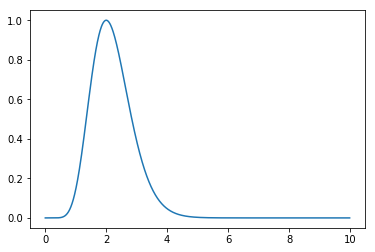

C:\Users\calcium\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


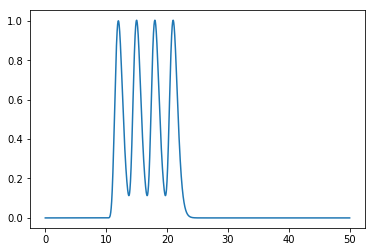

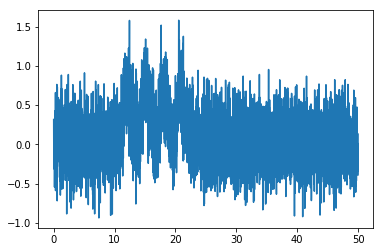

In [61]:
total_duration=50
t=np.arange(0,total_duration,1/fs)

def gammvarModel(t,ymax,tmax,a):
    baseline = np.zeros((total_duration*fs,1))
    events = np.array(np.dot([10, 13, 16, 19],fs))
    baseline[events] = 1
    fit = np.convolve(np.ravel(baseline),gammavar(ymax,tmax,a))[0:t.size]
    return fit
    
plt.figure()
plt.plot(t,gammvarModel(t,ymax,tmax,a))



y_noise = 0.3 * np.random.normal(size=t.size)
y_data = gammvarModel(t,0.7,2,a)  + y_noise

plt.figure()
plt.plot(t,y_data)


C:\Users\calcium\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


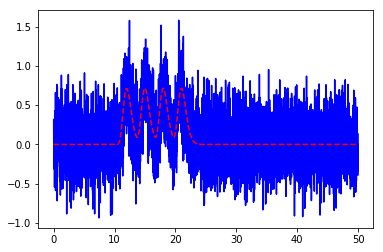

array([0.71161828, 1.99521431, 9.54867302])

In [62]:
from scipy.optimize import curve_fit as curve_fit

# >>> popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

popt, pcov = curve_fit(gammvarModel,t,y_data)

plt.plot(t, y_data, 'b-')
plt.plot(t, gammvarModel(t, *popt), 'r--')
plt.show()

popt